In [1]:
# Vamos a calcular un modelo base
import pandas as pd

In [2]:
df = pd.read_csv("data/df_train_small.csv")

In [3]:
# Buscar en Internet FICO Score

# Nos interesa las variables FICO
[name for name in df.columns if "fico" in name]

['fico_range_low',
 'fico_range_high',
 'last_fico_range_high',
 'last_fico_range_low',
 'sec_app_fico_range_low',
 'sec_app_fico_range_high']

In [ ]:
# : significa todas
df_fico = (df
           .loc[:, ["fico_range_low", "fico_range_high", "loan_status"]]
           .assign(prob_low=lambda x: (x["fico_range_low"] -300 )/(850-300))
           .assign(prob_high=lambda x: (x["fico_range_high"] -300 )/(850-300))
           .assign(prob=lambda x: (x["prob_low"] + x["prob_high"])/2)
           .assign(paid=lambda x: (x["loan_status"]== "Fully Paid").astype(int))
)

In [6]:
df_fico.head()

,fico_range_low,fico_range_high,loan_status,prob_low,prob_high,prob,paid
0,720.0,724.0,Fully Paid,0.763636,0.770909,0.767273,1
1,660.0,664.0,Fully Paid,0.654545,0.661818,0.658182,1
2,670.0,674.0,Fully Paid,0.672727,0.680000,0.676364,1
3,740.0,744.0,Fully Paid,0.800000,0.807273,0.803636,1
4,675.0,679.0,Fully Paid,0.681818,0.689091,0.685455,1


In [8]:
# primera metrica relacionada con clasificacion
loan_thershold = (670 - 300)/(850-300)
df_fico["pred"] = (df_fico["prob"] > loan_thershold).astype(int)


In [ ]:
# creo un classification report para el umbral de 670
from sklearn.metrics import classification_report

print(classification_report(df_fico["paid"], df_fico["pred"]))

              precision    recall  f1-score   support

           0       0.27      0.23      0.25     16236
           1       0.81      0.84      0.82     63764

    accuracy                           0.71     80000
   macro avg       0.54      0.53      0.54     80000
weighted avg       0.70      0.71      0.71     80000



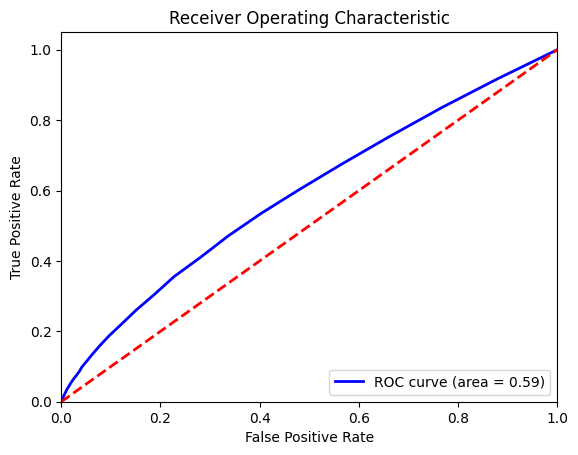

In [11]:
# dibujamos la curva ROC y calculamos el AUC
from sklearn.metrics import roc_curve, auc 
fpr, tpr, thresholds = roc_curve(df_fico["paid"], df_fico["prob"])
roc_auc = auc(fpr, tpr)
import matplotlib.pyplot as plt
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc) 
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


In [15]:
# por ultimo calibracion de probabilidades, con una curva de calibracion
from sklearn.calibration import calibration_curve
prob_true, prob_pred = calibration_curve(df_fico.loan_paid, df_fico.prob, n_bins=10)
plt.plot(prob_pred, prob_true, marker='o')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Predicted Probability')
plt.ylabel('True Probability')
plt.title('Calibration Curve')
plt.show()

AttributeError: 'DataFrame' object has no attribute 'loan_paid'